In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import average_precision_score


In [2]:
df_weather = pd.read_csv('sceaux_weather_data.csv', sep=',', parse_dates={'DateTime':['year', 'mo', 'da']},
                infer_datetime_format=True, low_memory=False, na_values=['nan','?'])

In [3]:
print(df_weather.info())
display(df_weather.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DateTime              1440 non-null   datetime64[ns]
 1   date                  1440 non-null   object        
 2   wban                  1440 non-null   int64         
 3   stn                   1440 non-null   int64         
 4   temp                  1440 non-null   float64       
 5   count_temp            1440 non-null   int64         
 6   dewp                  1440 non-null   float64       
 7   count_dewp            1440 non-null   int64         
 8   slp                   1440 non-null   float64       
 9   count_slp             1440 non-null   int64         
 10  stp                   1440 non-null   float64       
 11  count_stp             1440 non-null   int64         
 12  visib                 1440 non-null   float64       
 13  count_visib       

,DateTime,date,wban,stn,temp,count_temp,dewp,count_dewp,slp,count_slp,stp,count_stp,visib,count_visib,wdsp,count_wdsp,mxpsd,gust,max,flag_max,min,flag_min,prcp,flag_prcp,sndp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud,usaf,name,country,state,call,lat,lon,elev,begin,end,point_gis,fake_date
0,2006-12-16,2006-12-16,99999,71560,43.1,24,39.7,24,1024.3,24,1014.7,24,4.5,12,6.5,24,12.0,22.9,47.5,NaN,38.8,NaN,0.00,G,999.9,0,1,0,0,0,0,71560,PARIS-MONTSOURIS,FR,NaN,NaN,48.817,2.333,77.0,19831201,20190831,POINT(2.333 48.817),2000-01-01
1,2006-12-17,2006-12-17,99999,71560,40.0,24,37.2,24,1029.5,24,1019.8,24,5.4,12,2.5,24,4.1,9.9,46.2,NaN,34.0,NaN,0.13,G,999.9,0,0,0,0,0,0,71560,PARIS-MONTSOURIS,FR,NaN,NaN,48.817,2.333,77.0,19831201,20190831,POINT(2.333 48.817),2000-01-01
2,2006-12-18,2006-12-18,99999,71560,40.2,24,36.1,24,1029.1,24,1019.5,24,2.2,12,3.7,24,8.0,14.0,42.8,NaN,37.4,*,0.00,G,999.9,0,0,0,0,0,0,71560,PARIS-MONTSOURIS,FR,NaN,NaN,48.817,2.333,77.0,19831201,20190831,POINT(2.333 48.817),2000-01-01
3,2006-12-19,2006-12-19,99999,71560,36.7,24,29.7,24,1034.2,24,1024.5,24,6.6,12,8.0,24,12.0,22.9,41.4,NaN,32.9,NaN,0.00,G,999.9,0,0,0,0,0,0,71560,PARIS-MONTSOURIS,FR,NaN,NaN,48.817,2.333,77.0,19831201,20190831,POINT(2.333 48.817),2000-01-01
4,2006-12-20,2006-12-20,99999,71560,37.3,24,28.4,24,1037.6,24,1027.8,24,8.2,10,7.2,24,9.9,21.0,42.3,NaN,32.9,NaN,0.00,G,999.9,0,0,0,0,0,0,71560,PARIS-MONTSOURIS,FR,NaN,NaN,48.817,2.333,77.0,19831201,20190831,POINT(2.333 48.817),2000-01-01
5,2006-12-21,2006-12-21,99999,71560,41.4,24,33.7,24,1039.4,24,1029.7,24,5.3,11,7.9,24,9.9,22.9,47.3,NaN,35.1,NaN,0.00,G,999.9,0,0,0,0,0,0,71560,PARIS-MONTSOURIS,FR,NaN,NaN,48.817,2.333,77.0,19831201,20190831,POINT(2.333 48.817),2000-01-01
6,2006-12-22,2006-12-22,99999,71560,41.1,23,32.7,23,1039.4,23,1029.7,23,10.3,10,8.0,23,9.9,19.0,44.2,NaN,38.8,NaN,0.00,E,999.9,0,0,0,0,0,0,71560,PARIS-MONTSOURIS,FR,NaN,NaN,48.817,2.333,77.0,19831201,20190831,POINT(2.333 48.817),2000-01-01
7,2006-12-23,2006-12-23,99999,71560,36.8,24,32.1,24,1038.2,24,1028.4,24,5.0,8,5.6,24,9.9,17.1,42.1,NaN,35.2,*,0.00,G,999.9,0,0,0,0,0,0,71560,PARIS-MONTSOURIS,FR,NaN,NaN,48.817,2.333,77.0,19831201,20190831,POINT(2.333 48.817),2000-01-01
8,2006-12-24,2006-12-24,99999,71560,36.3,24,32.0,24,1036.4,24,1026.6,24,3.6,6,3.8,24,6.0,9.9,37.0,NaN,34.9,NaN,0.00,G,999.9,0,0,0,0,0,0,71560,PARIS-MONTSOURIS,FR,NaN,NaN,48.817,2.333,77.0,19831201,20190831,POINT(2.333 48.817),2000-01-01
9,2006-12-25,2006-12-25,99999,71560,34.5,24,31.6,24,1035.4,24,1025.6,24,2.9,10,3.9,24,6.0,9.9,37.0,NaN,32.2,*,0.00,G,999.9,0,0,0,0,0,0,71560,PARIS-MONTSOURIS,FR,NaN,NaN,48.817,2.333,77.0,19831201,20190831,POINT(2.333 48.817),2000-01-01


In [4]:
# temp - mean temp (fahrenheit) 
# visib - mean visibility (miles) max.10
# wdsp - mean wind speed max.10
# prcp - total precipitation 
# max - max temperature (fahrenheit)
# min - min temperature (fahrenheit)

df_weather = df_weather[['DateTime','temp', 'visib', 'wdsp', 'prcp', 'max', 'min']]

df_weather.reset_index().set_index('DateTime')

,index,temp,visib,wdsp,prcp,max,min
DateTime,,,,,,,
2006-12-16,0,43.1,4.5,6.5,0.00,47.5,38.8
2006-12-17,1,40.0,5.4,2.5,0.13,46.2,34.0
2006-12-18,2,40.2,2.2,3.7,0.00,42.8,37.4
2006-12-19,3,36.7,6.6,8.0,0.00,41.4,32.9
2006-12-20,4,37.3,8.2,7.2,0.00,42.3,32.9
...,...,...,...,...,...,...,...
2010-11-22,1435,40.8,3.9,7.0,0.03,41.7,39.0
2010-11-23,1436,41.5,5.7,4.5,0.00,44.6,37.6
2010-11-24,1437,42.5,11.0,4.6,0.01,46.8,39.4


In [5]:
df_weather.head()

,DateTime,temp,visib,wdsp,prcp,max,min
0,2006-12-16,43.1,4.5,6.5,0.00,47.5,38.8
1,2006-12-17,40.0,5.4,2.5,0.13,46.2,34.0
2,2006-12-18,40.2,2.2,3.7,0.00,42.8,37.4
3,2006-12-19,36.7,6.6,8.0,0.00,41.4,32.9
4,2006-12-20,37.3,8.2,7.2,0.00,42.3,32.9


In [6]:
df_weather.tail()

,DateTime,temp,visib,wdsp,prcp,max,min
1435,2010-11-22,40.8,3.9,7.0,0.03,41.7,39.0
1436,2010-11-23,41.5,5.7,4.5,0.00,44.6,37.6
1437,2010-11-24,42.5,11.0,4.6,0.01,46.8,39.4
1438,2010-11-25,38.6,8.6,4.3,0.00,43.5,34.5
1439,2010-11-26,34.3,7.6,5.2,0.00,38.7,32.2


In [7]:
df_weather.isnull().sum()

DateTime    0
temp        0
visib       0
wdsp        0
prcp        0
max         0
min         0
dtype: int64

In [8]:
df_weather.corr()

,temp,visib,wdsp,prcp,max,min
temp,1.000000,0.013455,-0.172892,0.026714,0.982290,0.969715
visib,0.013455,1.000000,-0.021725,-0.001183,0.006574,0.014427
wdsp,-0.172892,-0.021725,1.000000,0.146403,-0.191570,-0.124346
prcp,0.026714,-0.001183,0.146403,1.000000,0.013085,0.076092
max,0.982290,0.006574,-0.191570,0.013085,1.000000,0.928968
min,0.969715,0.014427,-0.124346,0.076092,0.928968,1.000000


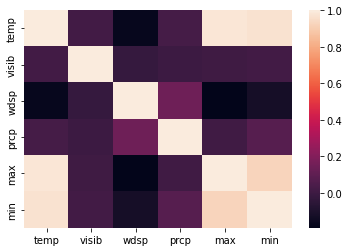

In [9]:
import seaborn as sns
sns.heatmap(df_weather.corr())

In [10]:
df_weather.describe()

,temp,visib,wdsp,prcp,max,min
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,54.336875,19.999028,5.933750,0.064229,61.869167,47.947639
std,11.589539,107.180467,2.132833,0.157938,13.607901,10.282612
min,23.500000,1.200000,1.400000,0.000000,29.100000,16.000000
25%,46.000000,6.200000,4.400000,0.000000,51.800000,40.600000
50%,54.500000,7.900000,5.500000,0.000000,62.200000,48.300000
75%,63.925000,10.400000,7.200000,0.050000,72.500000,56.700000
max,81.500000,999.900000,14.900000,1.760000,96.100000,72.700000


In [11]:
df_weather.corr('spearman').style.background_gradient(cmap='Blues')

,temp,visib,wdsp,prcp,max,min
temp,1.000000,0.386186,-0.166071,-0.085159,0.983107,0.967329
visib,0.386186,1.000000,0.028689,-0.063517,0.406891,0.326339
wdsp,-0.166071,0.028689,1.000000,0.272115,-0.182672,-0.118746
prcp,-0.085159,-0.063517,0.272115,1.000000,-0.108509,-0.007829
max,0.983107,0.406891,-0.182672,-0.108509,1.000000,0.927071
min,0.967329,0.326339,-0.118746,-0.007829,0.927071,1.000000


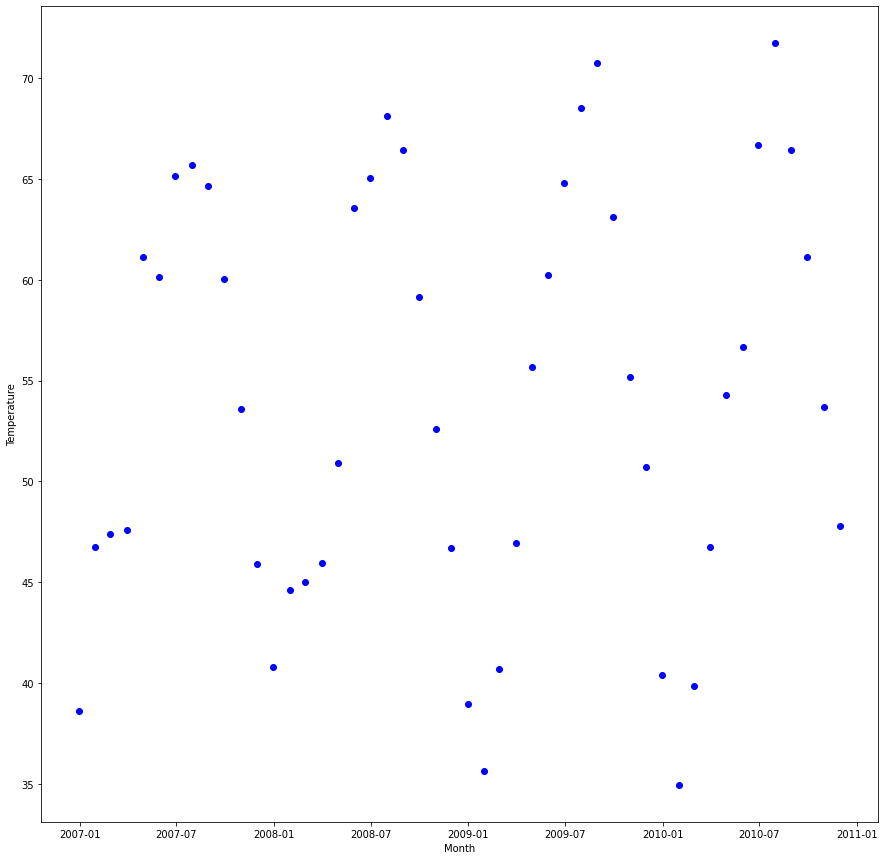

In [12]:
df_weather_month=df_weather.resample('m', on='DateTime').mean()


fig, ax = plt.subplots(figsize=(15,15))

ax.scatter(df_weather_month.index.values,
          df_weather_month['temp'], color='blue')
ax.set(xlabel='Month',ylabel='Temperature')
plt.show()


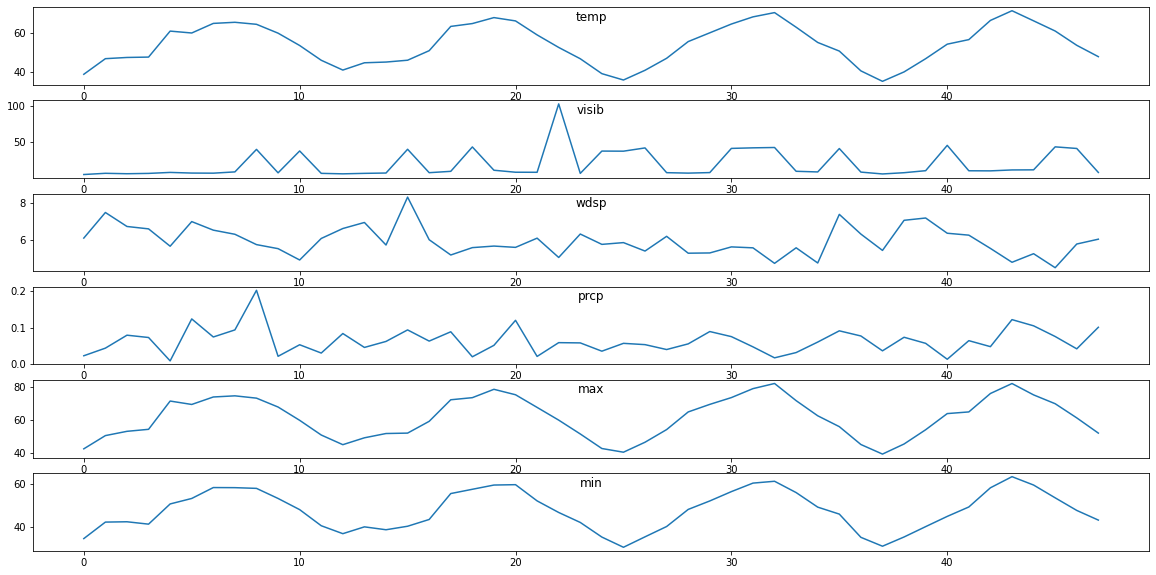

In [13]:
i = 1
cols=[0, 1, 2, 3, 4,5]
plt.figure(figsize=(20,10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df_weather_month.values[:, col])
    plt.title(df_weather_month.columns[col], y=0.75, loc='center')
    i += 1
plt.show()

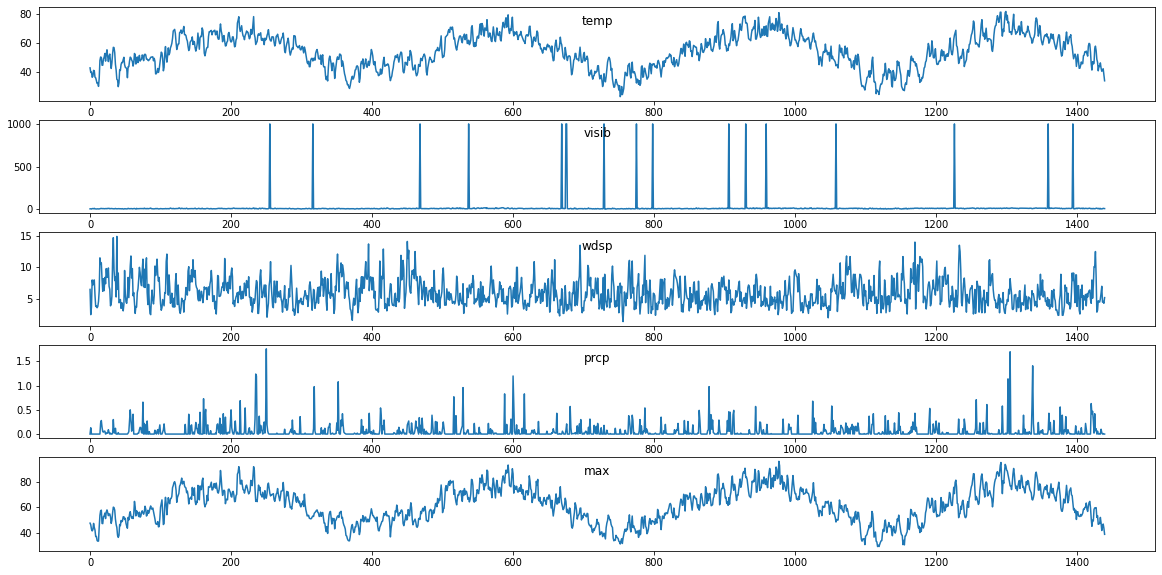

In [14]:
i = 1
cols=[ 1, 2, 3, 4,5]
plt.figure(figsize=(20,10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df_weather.values[:, col])
    plt.title(df_weather.columns[col], y=0.75, loc='center')
    i += 1
plt.show()

In [15]:
df_power = pd.read_csv('mean_power.csv', sep=',', index_col =0 )


/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [16]:
df_power['DateTime'] = pd.to_datetime(df_power['DateTime'])
df_power.dtypes



Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
DateTime                 datetime64[ns]
dtype: object

In [17]:
df_power.reset_index().set_index('DateTime')

,index,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,,
2006-12-16 17:24:00,1,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,2,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,3,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,4,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,5,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,2075255,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,2075256,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,2075257,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [18]:
df_power.info()
df_power.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075259 entries, 1 to 2075259
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   DateTime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 142.5 MB


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
1,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
2,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
3,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
4,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
5,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


In [19]:
df_power_daily=df_power.resample('D', on='DateTime').mean()

In [20]:
df_power_hourly=df_power.resample('H', on='DateTime').mean()

In [21]:
GAP_test= df_power_daily['Global_active_power']

In [22]:
pip install pykalman


     |████████████████████████████████| 228 kB 10.0 MB/s eta 0:00:01
  Created wheel for pykalman: filename=pykalman-0.9.5-py3-none-any.whl size=48461 sha256=a8f1f3104969124382a07bc21bee8f5a0c02c66f186f136fe4ecd0ce82f9d181
  Stored in directory: /root/.cache/pip/wheels/6a/04/02/2dda6ea59c66d9e685affc8af3a31ad3a5d87b7311689efce6
Successfully built pykalman


In [23]:
from pykalman import KalmanFilter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Construct a Kalman filter
kf = KalmanFilter(transition_matrices = [1],    # The value for At. It is a random walk so is set to 1.0
                  observation_matrices = [1],   # The value for Ht.
                  initial_state_mean = 0,       # Any initial value. It will converge to the true state value.
                  initial_state_covariance = 1, # Sigma value for the Qt in Equation (1) the Gaussian distribution
                  observation_covariance=1,     # Sigma value for the Rt in Equation (2) the Gaussian distribution
                  transition_covariance=1)    # A small turbulence in the random walk parameter 1.0
# Get the Kalman smoothing
state_means, _ = kf.filter(GAP_test.values)

# Call it KF_mean
GAP_kf = np.array(state_means)
GAP_kf

array([[1.52673737],
       [2.02338662],
       [1.7200316 ],
       ...,
       [1.20800673],
       [1.07565917],
       [1.13905119]])

In [24]:
# calculate RMSE

rmse = np.sqrt(mean_squared_error(GAP_test, GAP_kf))
print('RMSE value : {}'.format(rmse))

# calculate R2 Score
r2 = r2_score(GAP_test, GAP_kf)
print("R2 Score : {}".format(r2))

RMSE value : 0.13294982744859848
R2 Score : 0.9002565222017396


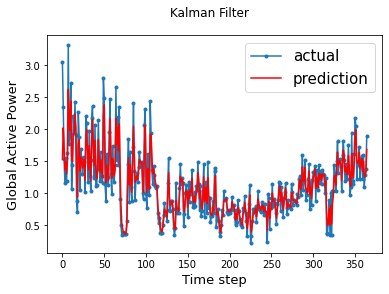

In [27]:
ap=[x for x in range(365)]
plt.plot(ap, GAP_test[:365], marker='.', label="actual")
plt.plot(ap, GAP_kf[:365],'r', label="prediction")
plt.ylabel('Global Active Power', size=13)
plt.xlabel('Time step', size=13)
plt.legend(fontsize=15)
plt.suptitle("Kalman Filter")
plt.show()